# Collecting the data


## Importing Necessary Libraries
First, we need to import the necessary libraries and packages to create this data frame.

In [151]:
import requests
from bs4 import BeautifulSoup 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Scraping the Data
After establishing the libraries, we can gather the location of our data on the Box Office Mojo webpage. 
We will abreviate Box Office Mojo as 'BOM' from now on with regard to code. 

In [ ]:
#Requests html from website
r = requests.get('https://www.boxofficemojo.com/year/2020/?ref_=bo_yl_table_1')
#Read HTML with BS
soup = BeautifulSoup(r.content, 'html.parser')
#find the table element, then grab all table rows (tr)
tble = soup.find('table').findAll('tr')
'''
Add Header code here
'''
#create master list to store movie data
master_lst = []
#loop through table rows (aka movies)
for tr in tble[1:]:
    #create temporary list to store movie data for this loop
    movie = []
    #find name inside the only 'a' tag
    name = tr.find('a').get_text()
    #grab all values with lass a-text-right
    money= x.findAll(class_='a-text-right')
    #grab the indexes for 3-6 since it doesnt change and has the gross data
    vals = [x.text for x in money[3:6]]
    #add name and extend values to temporary movie list
    movie.append(name)
    movie.extend(vals)
    #append this single movie the master movie list
    master_lst.append(movie)

In [ ]:
# first, request the html from the website
bom = requests.get("https://www.boxofficemojo.com/year/2020/?ref_=bo_yl_table_1")
# use BeautifulSoup package to read the html
bom_a_soup = BeautifulSoup(bom.content, 'html.parser')
bom_a_table = bom_soup.find('table')
bom_a_tr = bom_table.findAll('tr')

In [ ]:
movies_a = bom_a_tr[1:]
movies_a

## Cleaning the Data

In [15]:
# load the csv into a new varibale for easy acess and display
bom_df = pd.read_csv('BOM_top_200.csv', index_col=0)
bom_df

,Title,Year,Worldwide Lifetime Gross,Domestic Lifetime Gross,Domestic %,Foreign Lifetime Gross,Foreign %
0,Avengers: Endgame,2019,"$2,797,800,564","$858,373,000",30.7%,"$1,939,427,564",69.3%
1,Avatar,2009,"$2,790,439,092","$760,507,625",27.2%,"$2,029,931,467",72.8%
2,Titanic,1997,"$2,195,170,133","$659,363,944",30%,"$1,535,806,189",70%
3,Star Wars: Episode VII - The Force Awakens,2015,"$2,068,454,133","$936,662,225",45.3%,"$1,131,791,908",54.7%
4,Avengers: Infinity War,2018,"$2,048,359,754","$678,815,482",33.1%,"$1,369,544,272",66.9%
...,...,...,...,...,...,...,...
195,The Revenant,2015,"$532,950,503","$183,637,894",34.5%,"$349,312,609",65.5%
196,The Meg,2018,"$530,259,473","$145,443,742",27.4%,"$384,815,731",72.6%
197,Ralph Breaks the Internet,2018,"$529,323,962","$201,091,711",38%,"$328,232,251",62%
198,Hotel Transylvania 3: Summer Vacation,2018,"$528,583,774","$167,510,016",31.7%,"$361,073,758",68.3%


In [24]:
# check the dtypes for each value in each column to ensure our data is consistant
bom_df.dtypes

Title                       object
Year                         int64
Worldwide Lifetime Gross    object
Domestic Lifetime Gross     object
Domestic %                  object
Foreign Lifetime Gross      object
Foreign %                   object
dtype: object

In [20]:
# check for any missing values
bom_df.isnull().sum()

Title                       0
Year                        0
Worldwide Lifetime Gross    0
Domestic Lifetime Gross     0
Domestic %                  0
Foreign Lifetime Gross      0
Foreign %                   0
dtype: int64

In [21]:
# Cleaning columns containing characters that make the float an object
# left strip $ and right strip % 
bom_df['Worldwide Lifetime Gross'] = bom_df['Worldwide Lifetime Gross'].map(lambda x: x.lstrip('$'))
bom_df['Domestic Lifetime Gross'] = bom_df['Domestic Lifetime Gross'].map(lambda x: x.lstrip('$'))
bom_df['Foreign Lifetime Gross'] = bom_df['Foreign Lifetime Gross'].map(lambda x: x.lstrip('$'))
bom_df['Domestic %'] = bom_df['Domestic %'].map(lambda x: x.rstrip('%'))
bom_df['Foreign %'] = bom_df['Foreign %'].map(lambda x: x.rstrip('%'))
# bom_df['Worldwide Lifetime Gross'] = pd.to_numeric(bom_df['Worldwide Lifetime Gross'], errors='coerce')
# convert it to float and if there are dashes turn it into NaN
# IMDB_TOP1000_movies['gross_earning'] = pd.to_numeric(IMDB_TOP1000_movies['gross_earning'], errors='coerce')
bom_df.head(3)

,Title,Year,Worldwide Lifetime Gross,Domestic Lifetime Gross,Domestic %,Foreign Lifetime Gross,Foreign %
0,Avengers: Endgame,2019,"2,797,800,564","858,373,000",30.7,"1,939,427,564",69.3
1,Avatar,2009,"2,790,439,092","760,507,625",27.2,"2,029,931,467",72.8
2,Titanic,1997,"2,195,170,133","659,363,944",30,"1,535,806,189",70


In [23]:
# remove all commas from numeric values to convert dype
bom_df['Worldwide Lifetime Gross'] = bom_df['Worldwide Lifetime Gross'].str.replace(',', '')
bom_df['Domestic Lifetime Gross'] = bom_df['Domestic Lifetime Gross'].str.replace(',', '')
bom_df['Foreign Lifetime Gross'] = bom_df['Foreign Lifetime Gross'].str.replace(',', '')
bom_df.head()

,Title,Year,Worldwide Lifetime Gross,Domestic Lifetime Gross,Domestic %,Foreign Lifetime Gross,Foreign %
0,Avengers: Endgame,2019,2797800564,858373000,30.7,1939427564,69.3
1,Avatar,2009,2790439092,760507625,27.2,2029931467,72.8
2,Titanic,1997,2195170133,659363944,30,1535806189,70
3,Star Wars: Episode VII - The Force Awakens,2015,2068454133,936662225,45.3,1131791908,54.7
4,Avengers: Infinity War,2018,2048359754,678815482,33.1,1369544272,66.9


In [36]:
# change the dtypes for all gross values from object to integer
bom_df['Worldwide Lifetime Gross'] = pd.to_numeric(bom_df['Worldwide Lifetime Gross'], errors='coerce')
bom_df['Domestic Lifetime Gross'] = pd.to_numeric(bom_df['Domestic Lifetime Gross'], errors='coerce')
bom_df['Foreign Lifetime Gross'] = pd.to_numeric(bom_df['Foreign Lifetime Gross'], errors='coerce')

In [37]:
# check the updated dtypes
bom_df.dtypes

Title                       object
Year                         int64
Worldwide Lifetime Gross     int64
Domestic Lifetime Gross      int64
Domestic %                  object
Foreign Lifetime Gross       int64
Foreign %                   object
dtype: object

In [34]:
bom_df.head()

,Title,Year,Worldwide Lifetime Gross,Domestic Lifetime Gross,Domestic %,Foreign Lifetime Gross,Foreign %
0,Avengers: Endgame,2019,2797800564,858373000,30.7,1939427564,69.3
1,Avatar,2009,2790439092,760507625,27.2,2029931467,72.8
2,Titanic,1997,2195170133,659363944,30,1535806189,70
3,Star Wars: Episode VII - The Force Awakens,2015,2068454133,936662225,45.3,1131791908,54.7
4,Avengers: Infinity War,2018,2048359754,678815482,33.1,1369544272,66.9


In [71]:
# convert the remaining uncessecary objects into floats
bom_df['Domestic %'] = pd.to_numeric(bom_df['Domestic %'], errors='coerce')
bom_df['Foreign %'] = pd.to_numeric(bom_df['Foreign %'], errors='coerce')

In [72]:
bom_df.dtypes

Title                        object
Year                          int64
Worldwide Lifetime Gross      int64
Domestic Lifetime Gross       int64
Domestic %                  float64
Foreign Lifetime Gross        int64
Foreign %                   float64
dtype: object

In [74]:
bom_df.to_csv('cleaned BOM_top_200.csv')

In [75]:
df = pd.read_csv('cleaned BOM_top_200.csv')

In [114]:
df.sort_values(by = 'Worldwide Lifetime Gross', ascending = 0)[0:10]

,Unnamed: 0,Title,Year,Worldwide Lifetime Gross,Domestic Lifetime Gross,Domestic %,Foreign Lifetime Gross,Foreign %
0,0,Avengers: Endgame,2019,2797800564,858373000,30.7,1939427564,69.3
1,1,Avatar,2009,2790439092,760507625,27.2,2029931467,72.8
2,2,Titanic,1997,2195170133,659363944,30.0,1535806189,70.0
3,3,Star Wars: Episode VII - The Force Awakens,2015,2068454133,936662225,45.3,1131791908,54.7
4,4,Avengers: Infinity War,2018,2048359754,678815482,33.1,1369544272,66.9
5,5,Jurassic World,2015,1670401444,652270625,39.0,1018130819,61.0
6,6,The Lion King,2019,1657138876,543638043,32.8,1113500833,67.2
7,7,The Avengers,2012,1518815515,623357910,41.0,895457605,59.0
8,8,Furious 7,2015,1515253062,353007020,23.3,1162246042,76.7
9,9,Frozen II,2019,1450026933,477373578,32.9,972653355,67.1


In [207]:
df.loc[:,'Worldwide Lifetime Gross'].sort_values(ascending=False)[0:5].values/10**6

array([2797.800564, 2790.439092, 2195.170133, 2068.454133, 2048.359754])

In [ ]:
# using ranking bar
# top 5 ww lt gross
# in butterfly: 
# top 5 gross : left dom, right fore
# find movies comparable to top earner... what genre is it? which movies also have that g 

In [218]:
# frist, make sure the values are sorted by ww lifetime gross
df.sort_values(by = ['Worldwide Lifetime Gross'], ascending = False)
# isoltae the column needed
df.sort_values(by = ['Worldwide Lifetime Gross'], ascending = False)['Worldwide Lifetime Gross']
# grab the top 5 values
df.sort_values(by = ['Worldwide Lifetime Gross'], ascending = False)['Worldwide Lifetime Gross'][0:5].values
# assign to a variable
wwy = df.sort_values(by = ['Worldwide Lifetime Gross'], ascending = False)['Worldwide Lifetime Gross'][0:5].values/10**9
# grab the names of the top 5 values and assign to a variable
wwx = df.sort_values(by = ['Worldwide Lifetime Gross'], ascending = False)['Title'][0:5].values

Text(0.5, 0, 'Gross Earning')

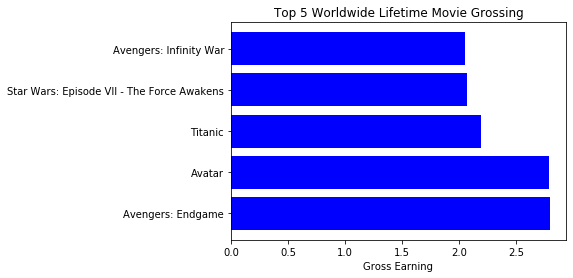

In [224]:
plt.barh(wwx,wwy, color = 'b')
plt.title('Top 5 Worldwide Lifetime Movie Grossing')
plt.xlabel('Gross Earning')

In [216]:
# domestic values
domy = df.sort_values(by = ['Domestic Lifetime Gross'], ascending = False)['Domestic Lifetime Gross'][0:5].values/10**6
domx = df.sort_values(by = ['Domestic Lifetime Gross'], ascending = False)['Title'][0:5].values

Text(0.5, 0, 'Gross Earning')

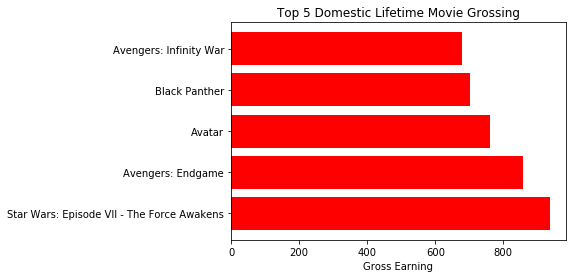

In [223]:
plt.barh(domx,domy, color = 'r')
plt.title('Top 5 Domestic Lifetime Movie Grossing')
plt.xlabel('Gross Earning')

In [212]:
# foreign values
fory = df.sort_values(by = ['Foreign Lifetime Gross'], ascending = False)['Foreign Lifetime Gross'][0:5].values/10**9
forx = df.sort_values(by = ['Foreign Lifetime Gross'], ascending = False)['Title'][0:5].values

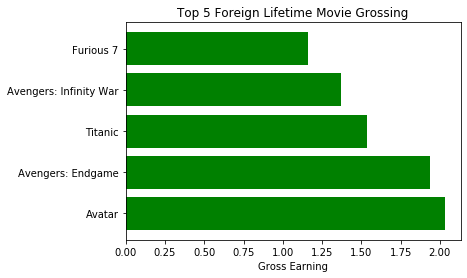

In [227]:
plt.barh(forx,fory, color = 'g')
plt.title('Top 5 Foreign Lifetime Movie Grossing')
plt.xlabel('Gross Earning')
plt.savefig('foreign grossing.png')